# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**RESPUESTA:**
Para no contrastar el modelo con mi subjetividad, buscaría diversos enfoques para evaluar los datos que estan mas relacionados en la tasacion. 
Primero consultaria con ellos, que son los profesionales, para saber que metricas piensan que son mas relevantes a la hora de estimar el valor. Haria una lista de la informacion que me brinden. Adicionalmente contactaria con amigos del rubro inmoviliario para que me den sus opiniones. Tambien buscaria obtener bases de datos de la competencia o del gobierno. 

Personalmente creo que datos como la superficie, el lugar, la antiguedad, amenities, tipo de propiedad, indices macroeconomicos del sector y el pais, densidad poblacional y precios de inmuebles aledaños me ayudarian por que la valuacion es una cuestion economica. Habria que ver la demanda del sector y que atriutos consideran los consumidores a la hora de elegir un inmueble.

Luego buscaria relaciones entre las variables para ver si hay atributos que estan correlacionados con el valor de un inmueble y su ponderacion.


### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [182]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy
import functools

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [183]:
df = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv",sep=',')
datapd = pd.DataFrame(df)
datapd.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [184]:
print('El dataset tiene 146.660 filas × 19 columnas')

El dataset tiene 146.660 filas × 19 columnas


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [185]:
print('Valores faltantes por columna:')
faltantes = datapd.count() - 146660 #como hay 146660 registros, lo que hacemos es calcular la cantidad de registros totales - la cantidad de registros en cada columna
print(faltantes) #valores faltantes por columna

Valores faltantes por columna:
start_date             0
end_date               0
created_on             0
lat                -9925
lon                -9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms          -5957
surface_total     -20527
surface_covered   -21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [186]:
print('Hay 10 tipos de propiedad', 'e Instancias')
pd.value_counts(datapd['property_type']) #tipos de propiedad en el dataset

Hay 10 tipos de propiedad e Instancias


Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

<AxesSubplot:xlabel='count', ylabel='property_type'>

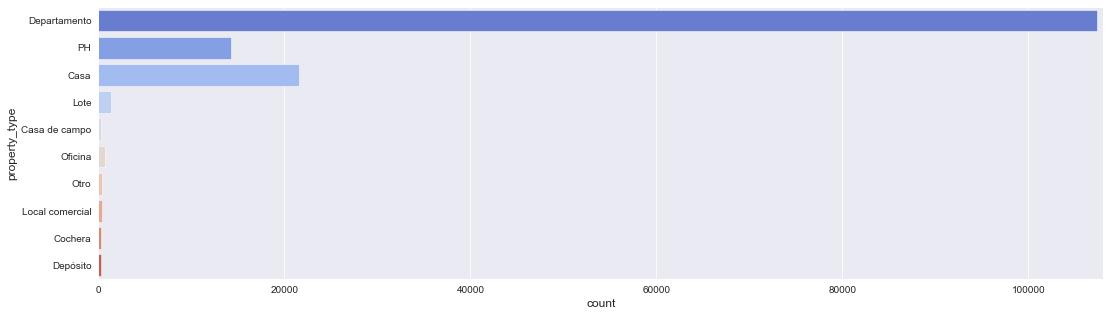

In [187]:
plt.figure(figsize=(18,5))
plt.xlim(0,108000)
sns.countplot(data = datapd, y = "property_type", palette="coolwarm") #Comparativa entre las cantidades de propiedades segun su tipo

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [188]:
#SHAPES

#ZONA: CAPITAL FEDERAL
dcaba = df[df.property_type.isin(['Departamento', 'Casa' , 'PH', 'Lote', 'Oficina', 'Otro','Local comercial', 'Casa de campo', 'Depósito', 'Cochera']) & df.l2.isin(['Capital Federal'])]
dcaba.shape

#ZONA: NORTE
dnorte = df[df.property_type.isin(['Departamento', 'Casa' , 'PH', 'Lote', 'Oficina', 'Otro','Local comercial', 'Casa de campo', 'Depósito', 'Cochera']) & df.l2.isin(['Bs.As. G.B.A. Zona Norte'])]
dnorte.shape

#ZONA: SUR
dsur = df[df.property_type.isin(['Departamento', 'Casa' , 'PH', 'Lote', 'Oficina', 'Otro','Local comercial', 'Casa de campo', 'Depósito', 'Cochera']) & df.l2.isin(['Bs.As. G.B.A. Zona Sur'])]
dsur.shape

#ZONA: OESTE
doeste = df[df.property_type.isin(['Departamento', 'Casa' , 'PH', 'Lote', 'Oficina', 'Otro','Local comercial', 'Casa de campo', 'Depósito', 'Cochera']) & df.l2.isin(['Bs.As. G.B.A. Zona Oeste'])]
doeste.shape

(12666, 19)

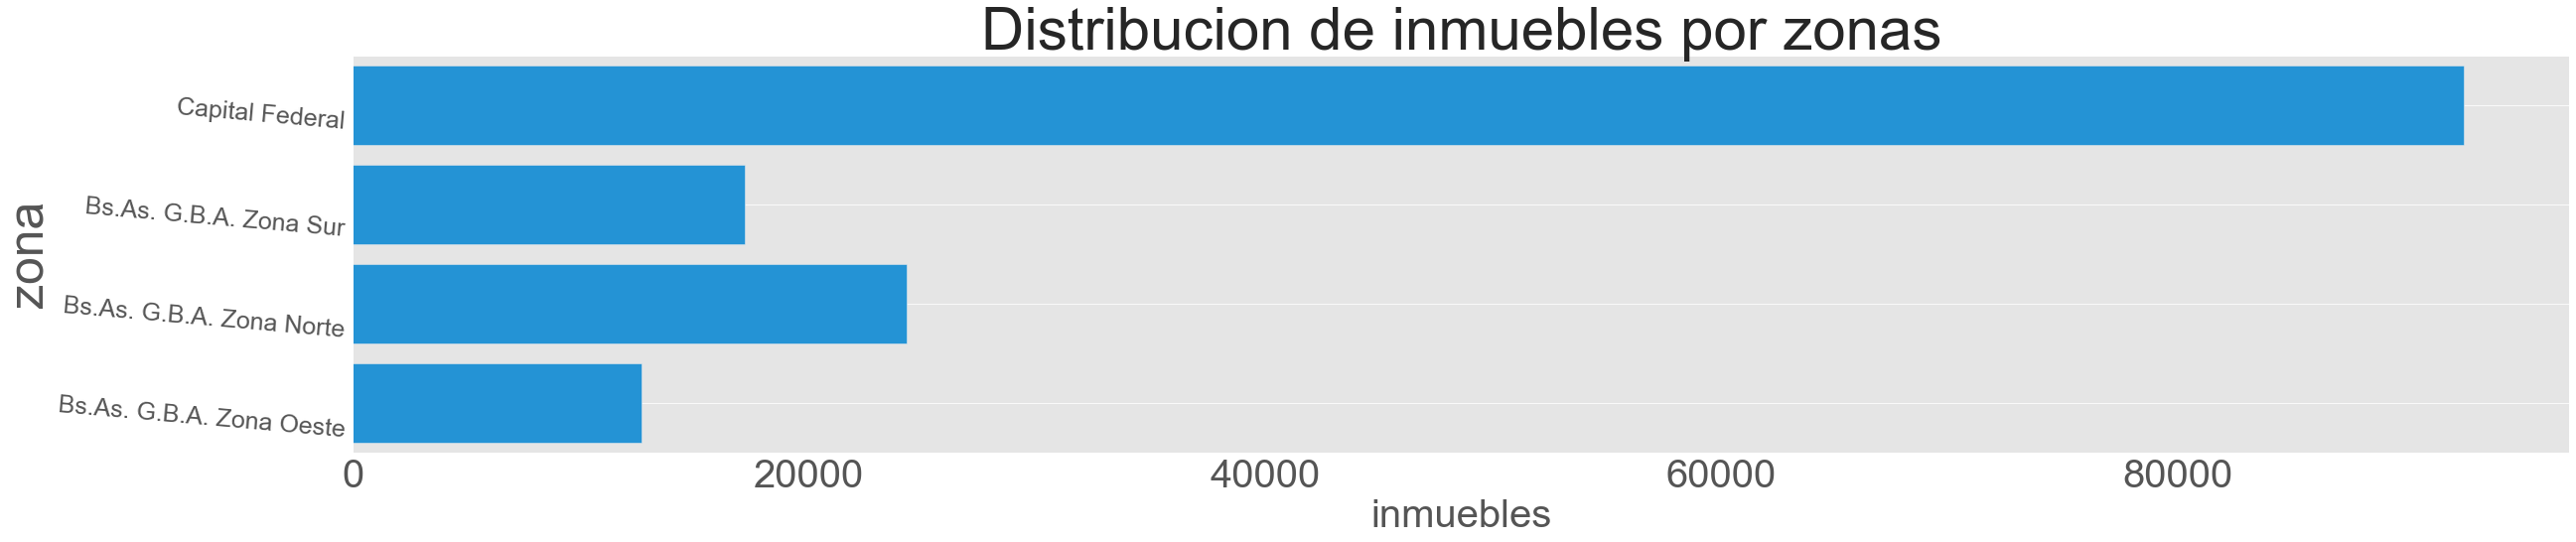

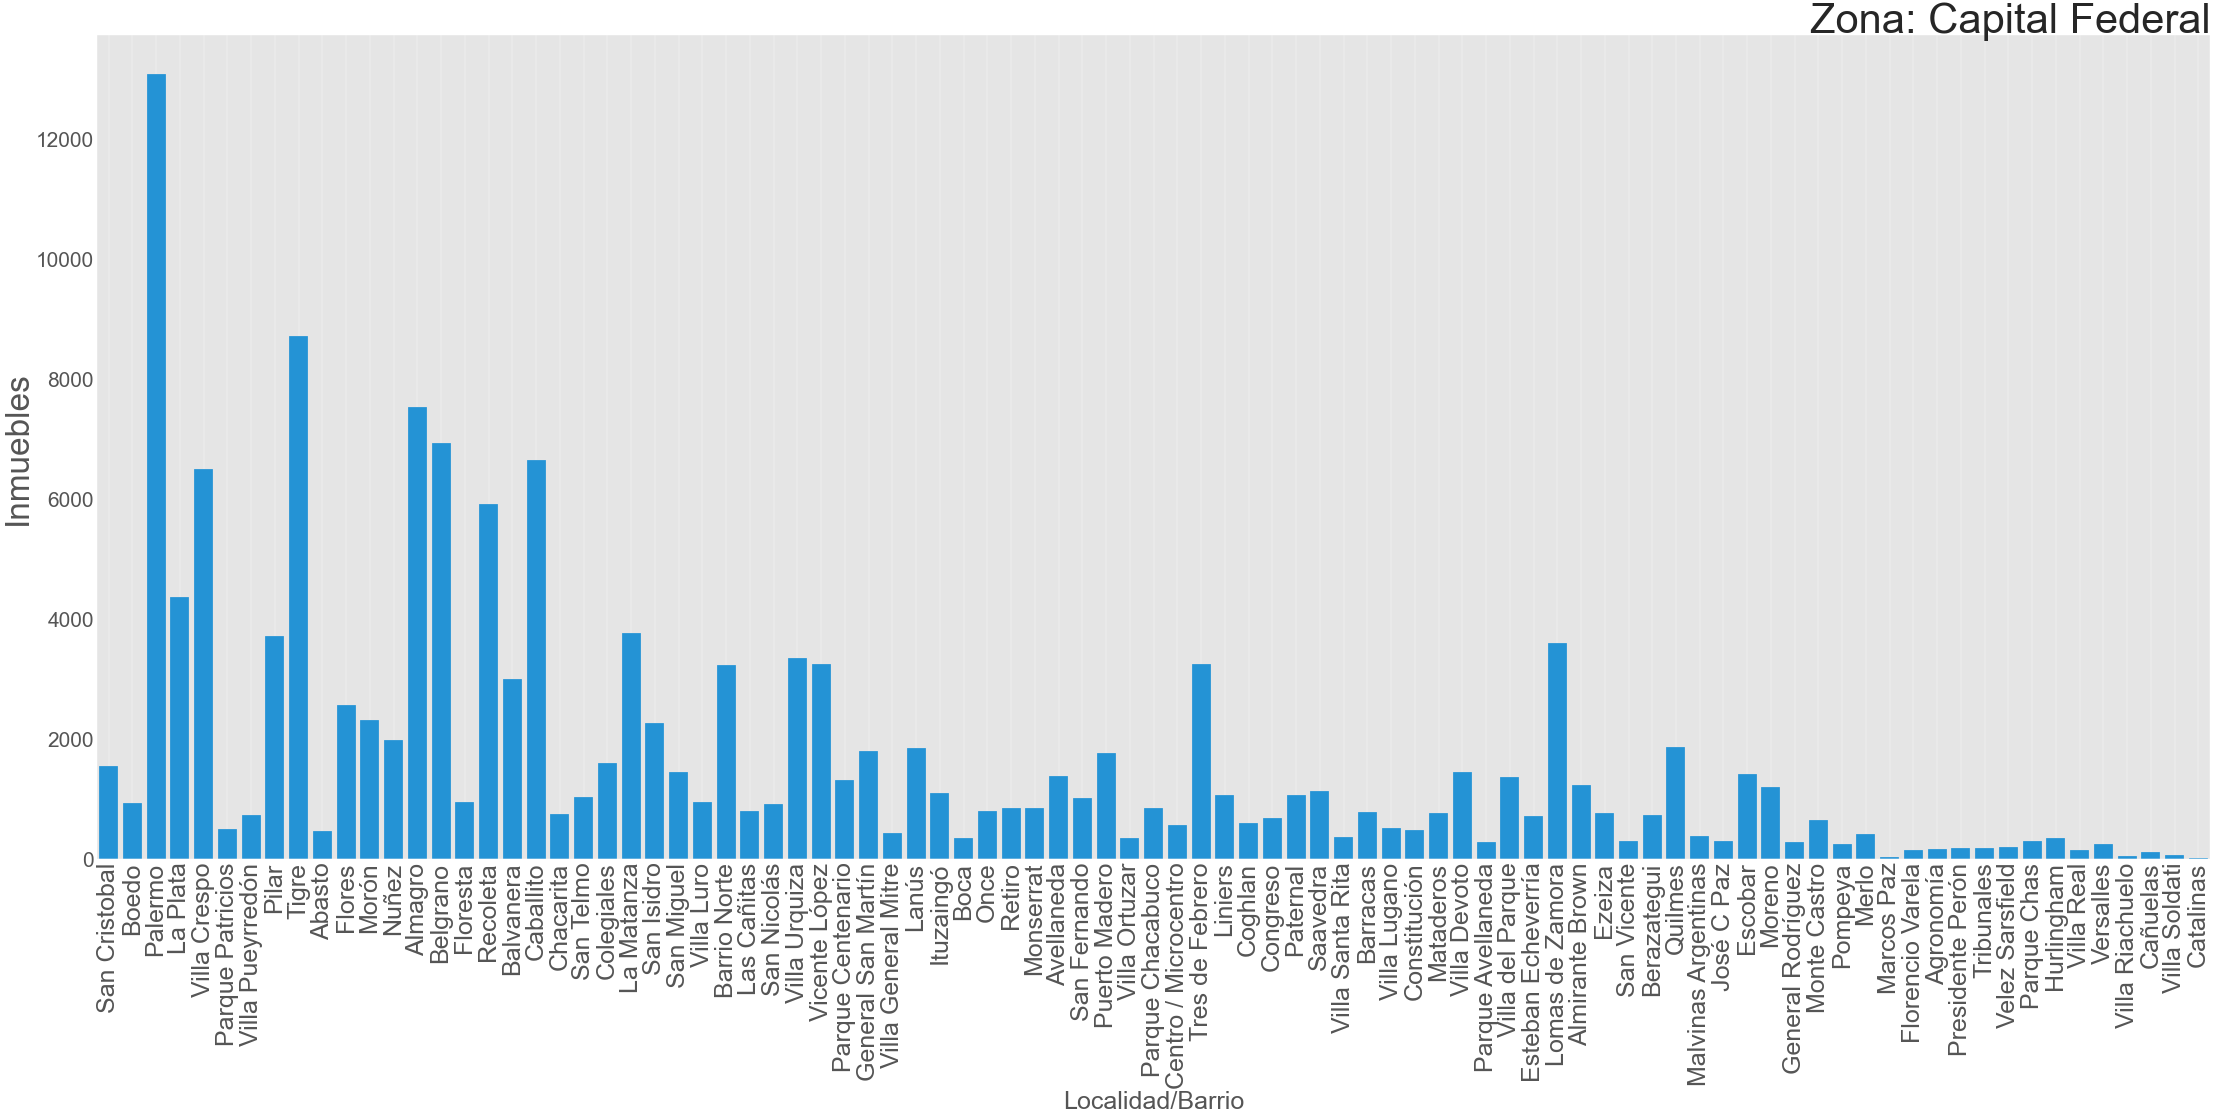

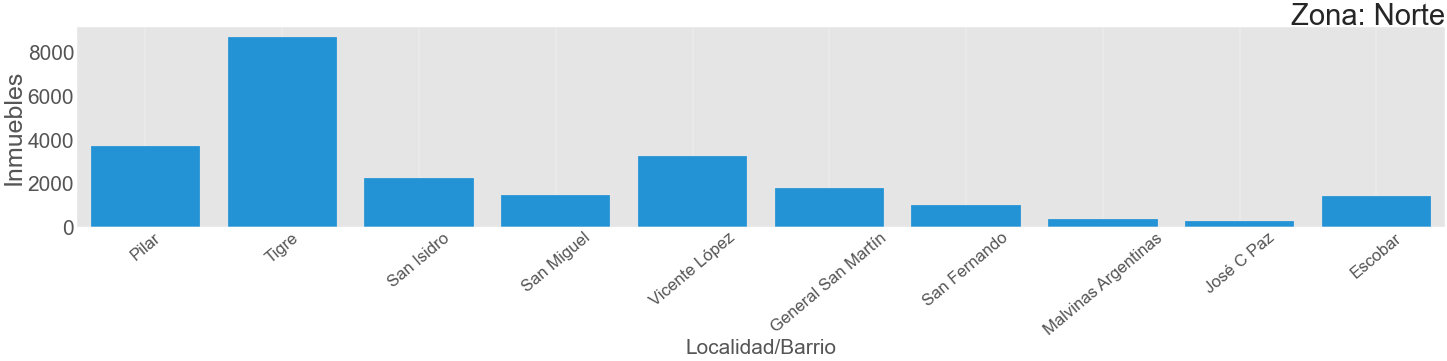

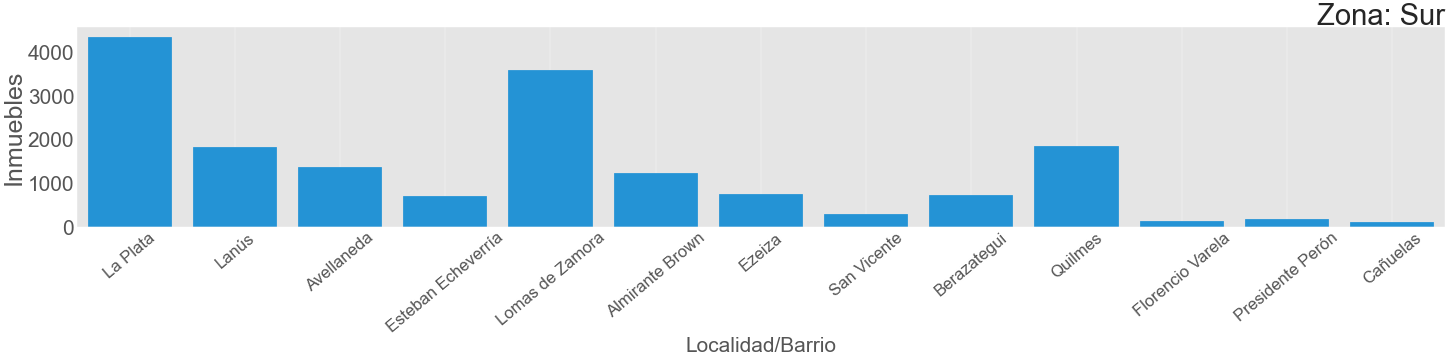

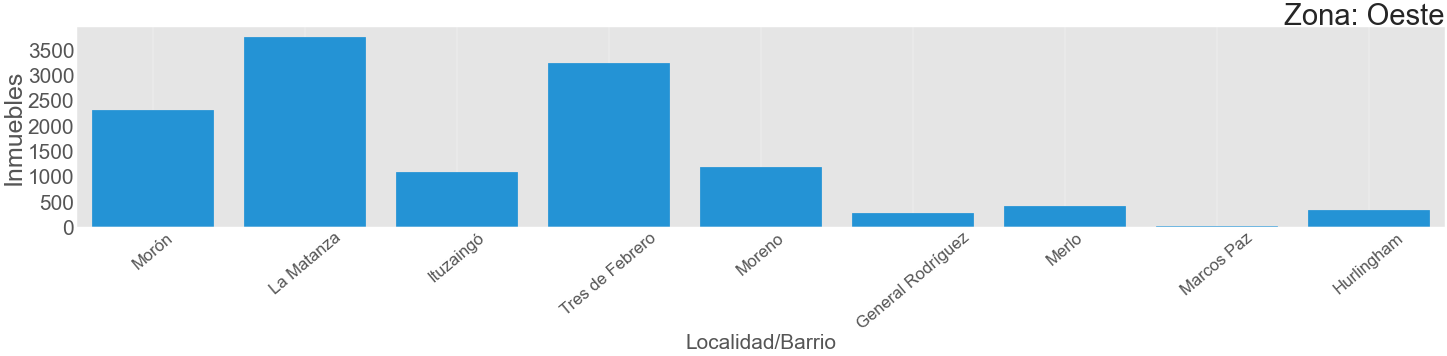

In [189]:
#ZONAS: TODAS

plt.figure(figsize=(40,25))
plt.style.use('ggplot')
plt.subplot(3,1,1)
sns.countplot(data = datapd, y = 'l2', color='#069AF3')
plt.xlabel('inmuebles', fontsize = 40)
plt.xticks(fontsize = 40)
plt.ylabel('zona', fontsize = 50)
plt.yticks(rotation = -5, size = 25)
plt.title('Distribucion de inmuebles por zonas',fontsize = 60, loc='center')
plt.grid()
plt.show()

#ZONA: CAPITAL FEDERAL
plt.figure(figsize=(200,80), dpi = 30)
plt.style.use('fast')
plt.subplot(2,2,1)
sns.countplot(data = datapd, x = 'l3', color='#069AF3')
xlim=(0,100)
plt.ylabel('Inmuebles', fontsize = 80)
plt.yticks(fontsize = 50)
plt.xlabel('Localidad/Barrio', fontsize = 60)
plt.xticks(rotation = 90, fontsize = 60)
plt.title('Zona: Capital Federal',fontsize = 100, loc='right')
plt.grid()
plt.show() #ver como agrandar la x y como hacer un grafico mejor

#ZONA: NORTE
plt.figure(figsize=(200,30), dpi = 30)
plt.style.use('fast')
plt.subplot(3,3,1)
sns.countplot(data = dnorte, x = 'l3', color='#069AF3')
xlim=(0,100)
plt.ylabel('Inmuebles', fontsize = 60)
plt.yticks(fontsize = 50)
plt.xlabel('Localidad/Barrio', fontsize = 50)
plt.xticks(rotation = 40, fontsize = 40)
plt.title('Zona: Norte',fontsize = 70, loc='right')
plt.grid()
plt.show() #ver como agrandar la x y como hacer un grafico mejor

#ZONA: SUR
plt.figure(figsize=(200,30), dpi = 30)
plt.style.use('fast')
plt.subplot(3,3,2)
sns.countplot(data = dsur, x = 'l3', color='#069AF3')
xlim=(0,100)
plt.ylabel('Inmuebles', fontsize = 60)
plt.yticks(fontsize = 50)
plt.xlabel('Localidad/Barrio', fontsize = 50)
plt.xticks(rotation = 40, fontsize = 40)
plt.title('Zona: Sur',fontsize = 70, loc='right')
plt.grid()
plt.show() #ver como agrandar la x y como hacer un grafico mejor

#ZONA: OESTE
plt.figure(figsize=(200,30), dpi = 30)
plt.style.use('fast')
plt.subplot(3,3,3)
sns.countplot(data = doeste, x = 'l3', color='#069AF3')
xlim=(0,100)
plt.ylabel('Inmuebles', fontsize = 60)
plt.yticks(fontsize = 50)
plt.xlabel('Localidad/Barrio', fontsize = 50)
plt.xticks(rotation = 40, fontsize = 40)
plt.title('Zona: Oeste',fontsize = 70, loc='right')
plt.grid()
plt.show() #ver como agrandar la x y como hacer un grafico mejor

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [190]:
#ZONA: CAPITAL FEDERAL
ds = df[df.property_type.isin(['Departamento', 'Casa' , 'PH']) & df.l2.isin(['Capital Federal'])]
ds.shape #como agregamos una columna nueva "Count" hay 20 columnas

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [191]:
columns= ['rooms','bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price'] #defino las variables elegidas
print('Mediana segun variable') #imprimo leyenda
datapd[columns].median() #calculo la Mediana

Mediana segun variable


rooms                   3.0
bedrooms                2.0
bathrooms               1.0
surface_total          78.0
surface_covered        68.0
price              166000.0
dtype: float64

In [192]:
print('Media segun variable') #imprimo leyenda
datapd[columns].mean() #calculo el promedio artimetico

Media segun variable


rooms                   3.079817
bedrooms                1.983240
bathrooms               1.599994
surface_total         216.872888
surface_covered       112.818011
price              241221.080199
dtype: float64

In [193]:
datapd.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


Es raro que el precio minimo sea de 5.500 usd para un inmueble. Tambien lo es el precio maximo rondando los 32 millones usd de una propiedad. Habria que ver tambien que inmueble tiene 35 cuartos (max) sabiendo que no tenemos hoteles en nuestro dataset por los tipos de propiedades vistos anteriormente. Tambien los datos de superficie estan raros. Pareceria a simple viste que hay outliers que impulsan nuestros valores a datos estadisticos errados.

Veamos como oscilan los valores de los tipos de propiedad segun la supercie total..

Text(0.5, 1.0, 'Tipo de propiedad por superficie total')

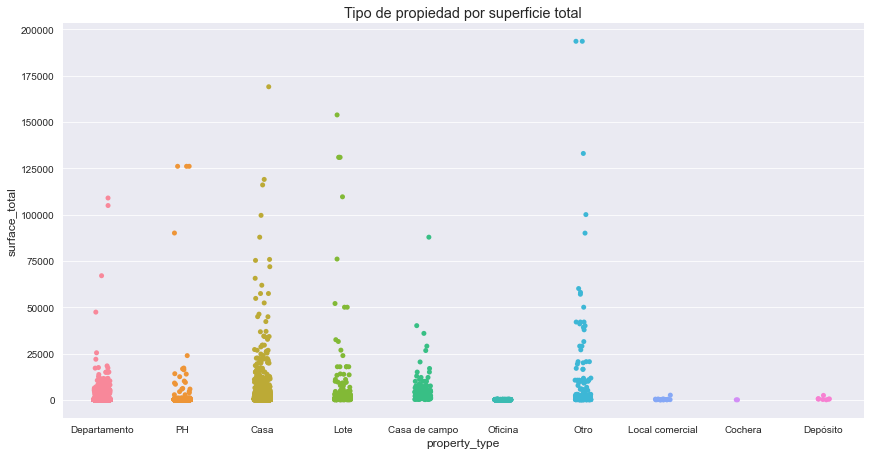

In [194]:
sns.set_style('darkgrid')
sns.catplot(x='property_type', y='surface_total', data=df, height=6, aspect=2)
plt.title('Tipo de propiedad por superficie total')

Vamos a haces un slice del grafico anterior para ver mas en detalle los rangos de estas variables y vamos a descartar los valores mayores a 50.000, la magnitud de este ultimo parametro va a depender del tipo de propiedad.

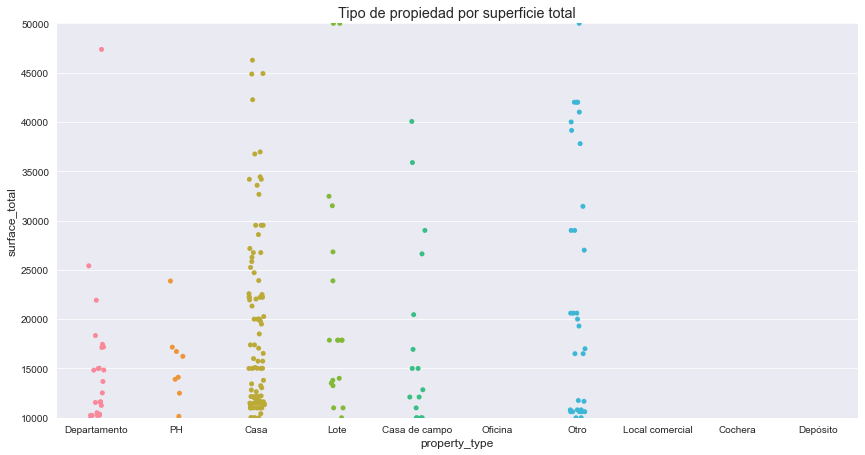

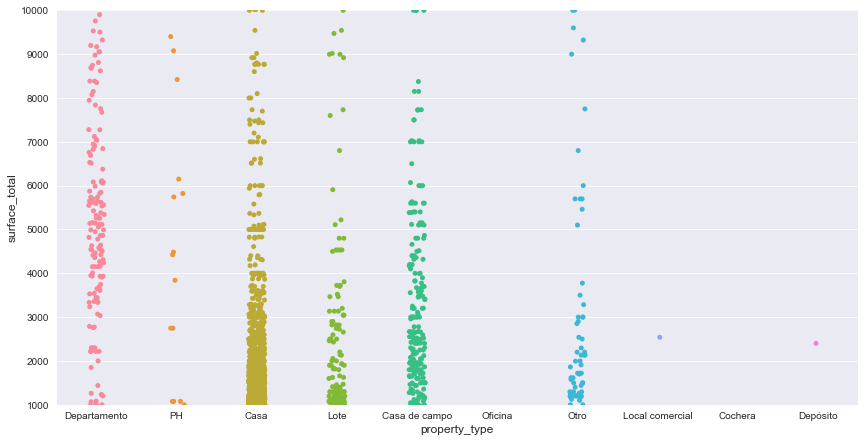

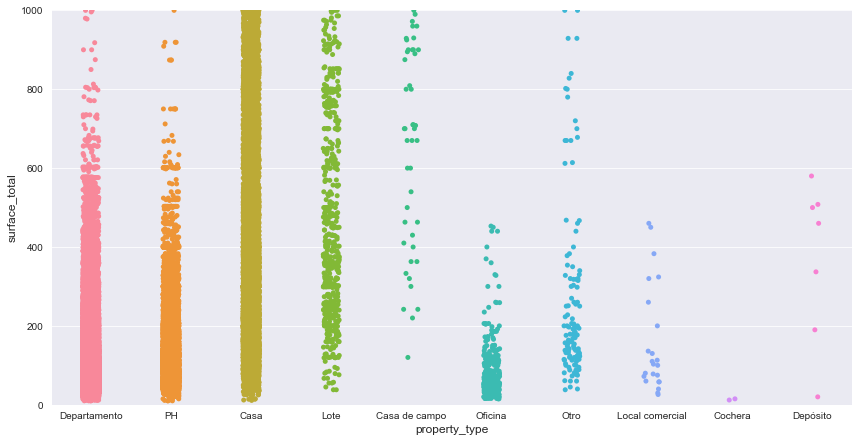

In [195]:
sns.set_style('darkgrid')
lim = sns.catplot(x='property_type', y='surface_total', data=df, height=6, aspect=2)
lim.set(ylim=(10000, 50000))
plt.title('Tipo de propiedad por superficie total')

lim = sns.catplot(x='property_type', y='surface_total', data=df, height=6, aspect=2)
lim.set(ylim=(1000, 10000))

lim = sns.catplot(x='property_type', y='surface_total', data=df, height=6, aspect=2)
lim.set(ylim=(0, 1000))

Vamos a acotar el analisis a superficies mayores a 20 y menores a 4000. Tambien se debe dar que la superficie total sea menor o igual a la superficie cubierta.

Pero antes vamos a ver si la variable precio tiene outliers basandonos en la descripcion que hicimos anteriormente. 

Text(0.5, 1.0, 'Tipo de propiedad por precio')

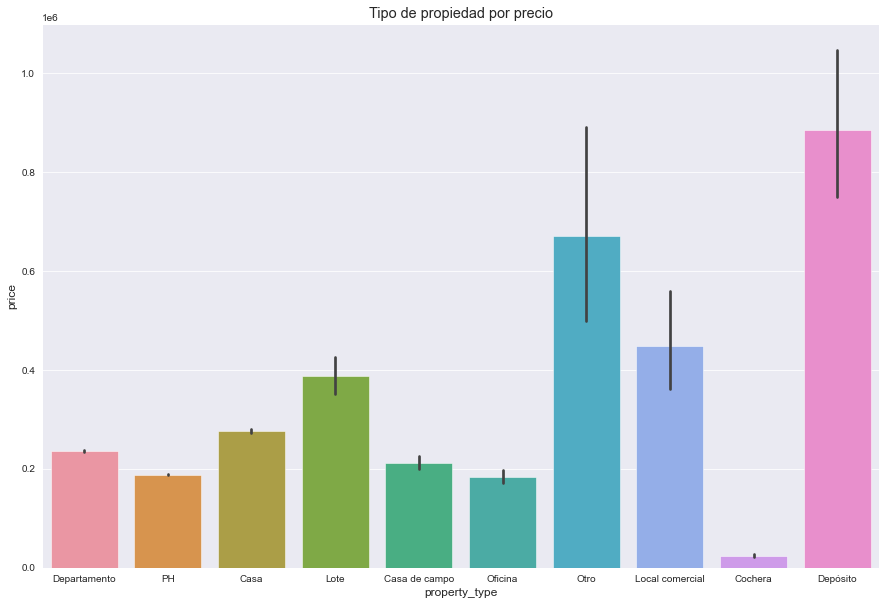

In [196]:
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.barplot(x='property_type', y='price', data=df)
plt.title('Tipo de propiedad por precio')

Establecemos un valor de entre 5.000 usd y 3.000.000 usd y estabelcemos las condiciones mencionadas para la superficie.

In [197]:
def conjunction(*conditions):
    return functools.reduce(np.logical_and, conditions)

c1 = datapd.price <= 3000000
c2 = datapd.price >= 5000
c3 = datapd.surface_total >= datapd.surface_covered
c4 = datapd.surface_total <= 4000
c5 = datapd.surface_total >= 20

datapd2 = datapd[conjunction(c1,c2,c3,c4,c5)]
datapd2

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,Venta


In [198]:
print('Unas',146660-122401,'filas menos con respecto al inicio con las condiciones establecidas')

Unas 24259 filas menos con respecto al inicio con las condiciones establecidas


In [ ]:
sns.pairplot(data = datapd2, hue = 'property_type',height=10, aspect=4,)
#sns.color_palette("Blues", as_cmap=True)

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

<AxesSubplot:title={'center':'Correlación PH'}>

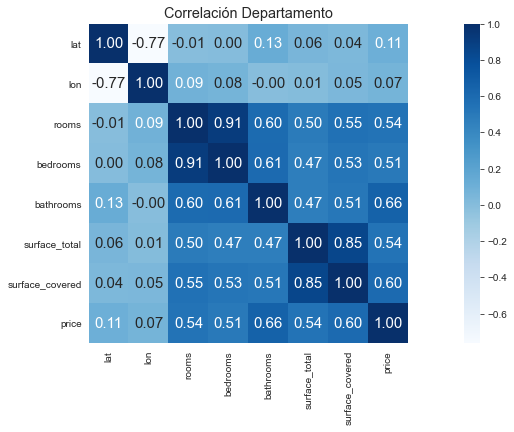

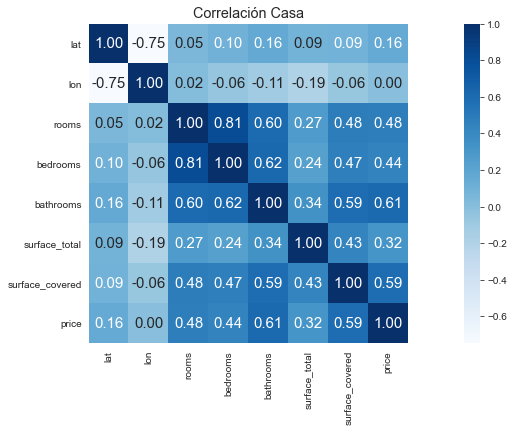

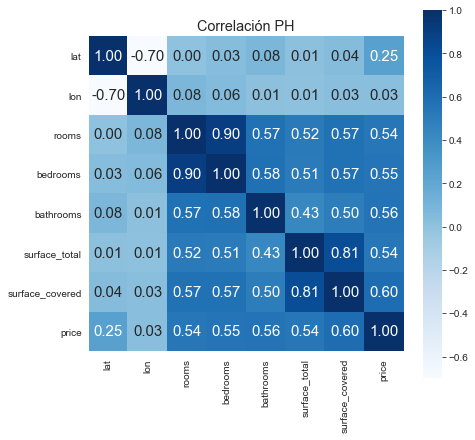

In [200]:
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
plt.title("Correlación Departamento")
sns.heatmap(datapd2[datapd2.property_type== 'Departamento'].corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15}, cmap= 'Blues')

plt.figure(figsize=(20,20))
plt.subplot(3,1,2)
plt.title("Correlación Casa")
sns.heatmap(datapd2[datapd2.property_type== 'Casa'].corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15}, cmap= 'Blues')

plt.figure(figsize=(24,23))
plt.subplot(3,3,3)
plt.title("Correlación PH")
sns.heatmap(datapd2[datapd2.property_type== 'PH'].corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15}, cmap= 'Blues')

Vemos que en todos los casos la variable que tiene mas correlacion con el precio es la superficie cubierta. Vemos tambien que cada atributo varia dependiendo del tipo de inmueble y que cada uno asigna diferente ponderacion. 

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


**RESPUESTA** Una pregunta que podria plantear es ¿Qué lugar tiene mayor cantidad de inmuebles en venta? Podriamos responder Palermo, en la zona de Capital Federal. Viendo estos graficos podemos deducir esto, pero ¿cuales serian los sesgos? debemos saber que el analisis hecho se basa en un dataset de Properati. Puede ser que esta empresa tenga sus filiales en Palermo y por eso la gente prefiere elegir a esta inmobiliaria por estar en la zona. Para ir mitigando este sesgo deberiamos tener datos de otras inmobilirias, incluso podria pasar que un cliente no publique en las inmobiliarias.
Debemos saber que el analisis hecho esta acotado a los dataset que tengamos y su informacion fidedigna. Para este caso podemos tambien nutrir nuestro modelo con datasets de la competencia.

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [ ]:
#columns = ['rooms', 'bedrooms','bathrooms','surface_total','surface_covered','price'] #definir atributos/columnas necesarias
#baseML1 = baseML0[baseML0.property_type.isin(['Departamento', 'Casa' , 'PH']) & baseML0.l2.isin(['Capital Federal']) & (baseML0.surface_total >=15) & (baseML0.surface_total <=1000) & (baseML0.price <= 4000000)]
#aplicar filtror requeridos

#baseML1[columns].dropna()  #invocar la base con los filtros requeridos y que elimite nulls

def conjunction(*conditions):
    return functools.reduce(np.logical_and, conditions)

c1 = datapd.price <= 4000000
c3 = datapd.surface_total >= datapd.surface_covered
c4 = datapd.surface_total <= 1000
c5 = datapd.surface_total >= 15

datapd3 = datapd[conjunction(c1,c2,c3,c4,c5)]

#baseML = datapd3[datapd3.property_type.isin(['Departamento', 'Casa' , 'PH']) & datapd3.l2.isin(['Capital Federal'])
#baseML[columns].dropna()

In [ ]:
columns = ['rooms', 'bedrooms','bathrooms','surface_total','surface_covered','price'] #definir atributos/columnas necesarias
baseML = datapd3[datapd3.property_type.isin(['Departamento', 'Casa' , 'PH']) & datapd3.l2.isin(['Capital Federal'])]
#aplicar filtror requeridos
#baseML1[columns].dropna()  #invocar la base con los filtros requeridos y que elimite nulls
baseML[columns]